# Week 5 task:   K-Means Clustering and Principle Component Analysis

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA


In [145]:
df = pd.read_csv("my_data.csv", index_col = "DEPTH_MD")

In [146]:
df


,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
494.528,1.884186,80.200851,NaN,20.915468,161.131180
494.680,1.889794,79.262886,NaN,19.383013,160.603470
494.832,1.896523,74.821999,NaN,22.591518,160.173615
494.984,1.891913,72.878922,NaN,32.191910,160.149429
495.136,1.880034,71.729141,NaN,38.495632,160.128342
...,...,...,...,...,...
3271.416,2.630211,19.418915,0.187811,NaN,NaN
3271.568,2.643114,21.444370,0.185574,NaN,NaN
3271.720,2.681300,22.646879,0.176074,NaN,NaN


In [147]:
df = df.dropna()

In [148]:
df

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085
...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836


In [149]:
df.describe()

,RHOB,GR,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,0.414572,3.912313,121.409905
std,0.251592,29.902708,0.139207,1.816933,30.394369
min,1.493417,6.191506,0.037976,1.126667,55.726753
25%,1.983767,42.792794,0.313797,2.629141,89.977041
50%,2.059335,62.886322,0.466891,3.365132,138.477173
75%,2.389839,77.726776,0.513840,4.686422,146.242302
max,2.889454,499.022583,0.800262,17.026619,163.910797


### Standardization

In [150]:
scaler = StandardScaler()

X = df[['RHOB', 'NPHI', 'GR', 'PEF', 'DTC']]
df_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(df_scaled, columns=X.columns, index=X.index)

# Printing the transformed DataFrame
print(df_scaled.head())

              RHOB      NPHI        GR       PEF       DTC
DEPTH_MD                                                  
1138.704 -1.491843  2.523654 -0.179292 -1.255364  0.869531
1138.856 -1.387067  2.770744 -0.010859 -1.247886  0.690042
1139.008 -1.320646  2.524300  0.028875 -1.247450  0.554350
1139.160 -1.274390  2.068584 -0.008126 -1.261572  0.585297
1139.312 -1.335919  1.617342 -0.092056 -1.325067  0.752808


### Optimizing K_means and PLotting by the Elbow Method

In [151]:
def optimise_k_means(data, max_k):
    means =[]
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Numbers of Clusters')
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

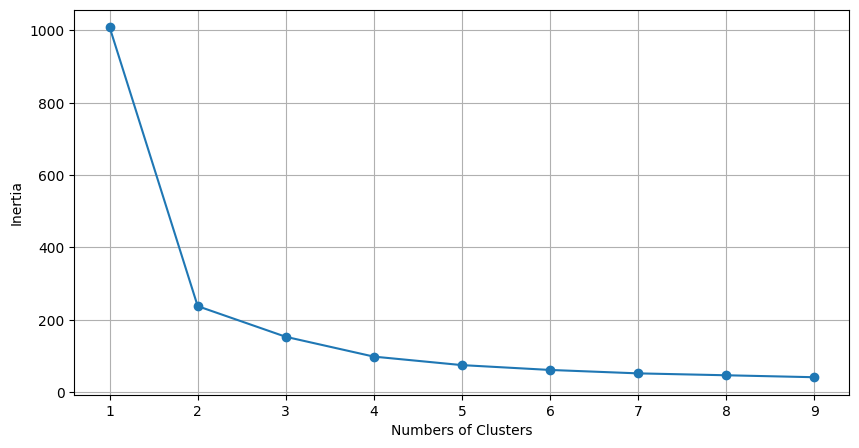

In [152]:
optimise_k_means(df[['RHOB', 'NPHI']], 10)

### 3 Clusters based on NPHI and RHOB data

In [153]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(df[['NPHI', 'RHOB']])

KMeans(n_clusters=3)

In [154]:
df['kmeans_3'] = kmeans.labels_

C:\Users\beeni\AppData\Local\Temp\ipykernel_6060\3846323702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kmeans_3'] = kmeans.labels_


In [155]:
df

,RHOB,GR,NPHI,PEF,DTC,kmeans_3
DEPTH_MD,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,2
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,2
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,2
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,2
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,2
...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,0
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,0
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,0


### Scatter Plot of 3 Clusters

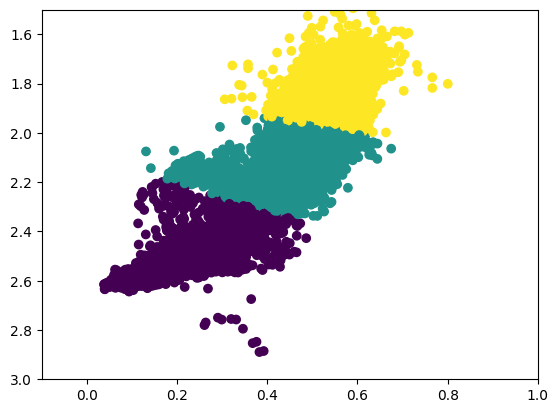

In [156]:
plt.scatter(x=df['NPHI'], y = df['RHOB'], c=df['kmeans_3'])
plt.xlim(-0.1, 1)
plt.ylim(3, 1.5)
plt.show()

# Principle Component Analysis

In [157]:
X = df_scaled
y=df['kmeans_3']

In [158]:
X

,RHOB,NPHI,GR,PEF,DTC
DEPTH_MD,,,,,
1138.704,-1.491843,2.523654,-0.179292,-1.255364,0.869531
1138.856,-1.387067,2.770744,-0.010859,-1.247886,0.690042
1139.008,-1.320646,2.524300,0.028875,-1.247450,0.554350
1139.160,-1.274390,2.068584,-0.008126,-1.261572,0.585297
1139.312,-1.335919,1.617342,-0.092056,-1.325067,0.752808
...,...,...,...,...,...
2993.256,1.265151,-0.524699,0.979338,0.433103,-1.149449
2993.408,1.222550,-0.456081,0.921870,0.433103,-1.158891
2993.560,1.110101,-0.356250,1.032560,0.433103,-1.105910


### Splitting Data into Train and Test Parts

In [159]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state=39)

### Used Decision Tree Classifier Technique to Train the model

In [160]:
dtc = DecisionTreeClassifier()
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [161]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [162]:
y_pred =dtc.predict(X_test)

In [163]:
#Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1017
           1       1.00      1.00      1.00      1834
           2       1.00      1.00      1.00       810

    accuracy                           1.00      3661
   macro avg       1.00      1.00      1.00      3661
weighted avg       1.00      1.00      1.00      3661



## Reduced the Data in 3 Components using PCA

In [164]:
#Principle Component Analysis(3-components)

pca = PCA(n_components =3)
X_pca =pca.fit_transform(X)
X_pca.shape
pca.explained_variance_ratio_


array([0.60802062, 0.19375711, 0.16450099])

In [165]:
X_train_pca, X_test_pca, y_train, y_test =train_test_split(X_pca, y, test_size = 0.3, random_state =30)
dtc = DecisionTreeClassifier()
dtc.fit(X_train_pca, y_train)
dtc.score(X_test_pca, y_test)
#print(classification_report(X_test_pca, y_test))

0.8989347172903578

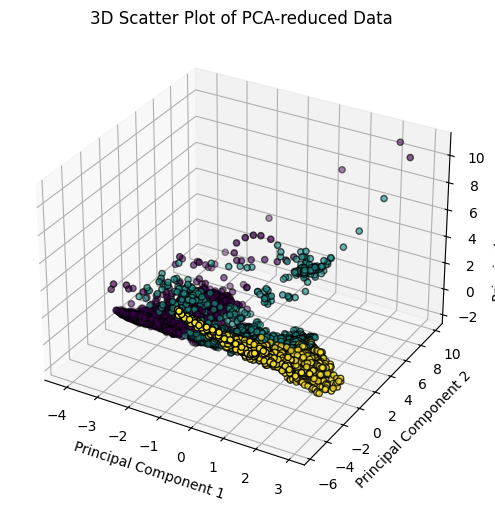

In [166]:
# 3D Scatter PLot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', edgecolors='k')


ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA-reduced Data')

plt.show()



## Reduced the Data in 2 Components using PCA

In [167]:
#Principle Component Analysis(2-components)

pca = PCA(n_components =2)
X_pca =pca.fit_transform(X)
X_pca.shape


X_train_pca, X_test_pca, y_train, y_test =train_test_split(X_pca, y, test_size = 0.3, random_state =30)
dtc = DecisionTreeClassifier()
dtc.fit(X_train_pca, y_train)
dtc.score(X_test_pca, y_test)
#print(classification_report(X_test_pca, y_test))


0.8901939360830374

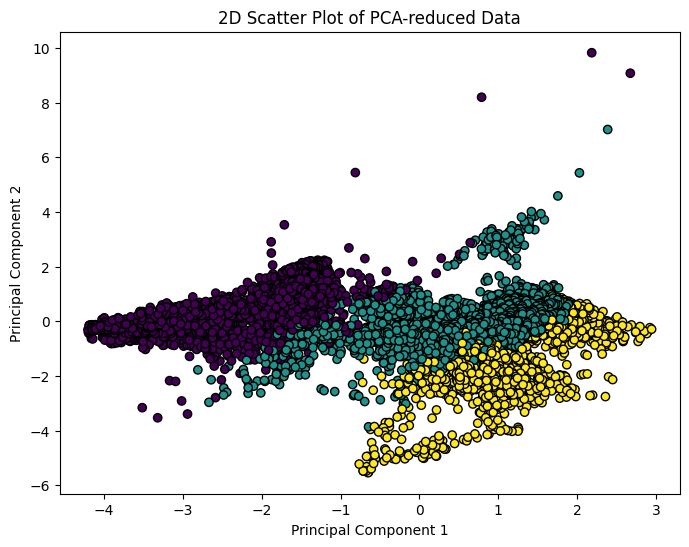

In [168]:
import matplotlib.pyplot as plt

# Create 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k')

# Labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of PCA-reduced Data')

# Show the plot
plt.show()
